In [147]:
%load_ext autoreload
%autoreload 2
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
import pandas as pd
import datetime
import pickle
import math
from random import random

#from tools import e as tls

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


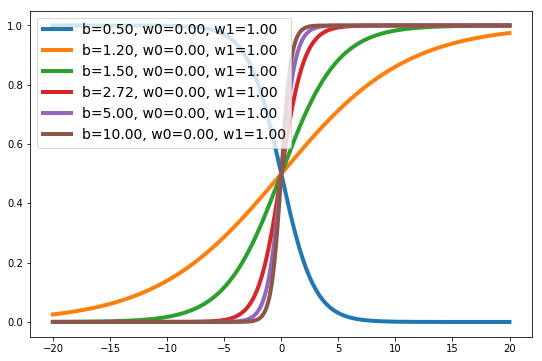

In [142]:
plt.figure(figsize=(9,6))
for b in [0.5, 1.2, 1.5, math.exp(1), 5, 10]:
    plot_logistic(b, 0, 1)
plt.legend(loc=2, fontsize=14)

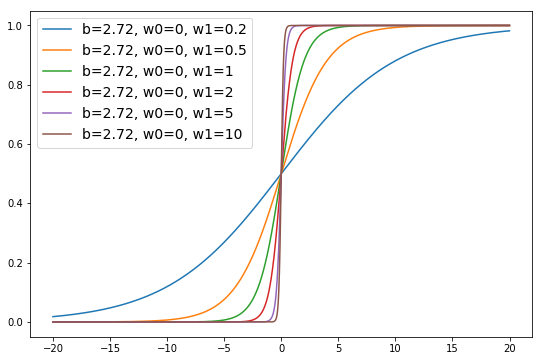

In [72]:
plt.figure(figsize=(9,6))
for w1 in [0.2, 0.5, 1, 2, 5, 10]:
    plot_logistic(math.exp(1), 0, w1)
plt.legend(loc=2, fontsize=14)

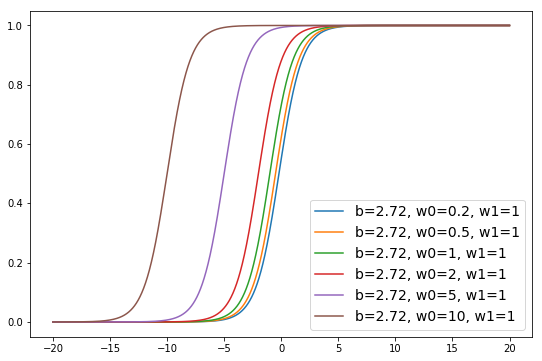

In [73]:
plt.figure(figsize=(9,6))
for w0 in [0.2, 0.5, 1, 2, 5, 10]:
    plot_logistic(math.exp(1), w0, 1)
plt.legend(loc=4, fontsize=14)

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
def sharp_edge(x, border=0):
    if x >= border:
        return 1
    else:
        return 0

In [128]:
x = make_x()
X = np.matrix(x).reshape(4000,1)
Y = np.matrix([sharp_edge(i) for i in x]).reshape((4000,1))

In [129]:
clf = LogisticRegression(fit_intercept=True)

In [130]:
clf.fit(X,Y)

/Users/eguseva/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

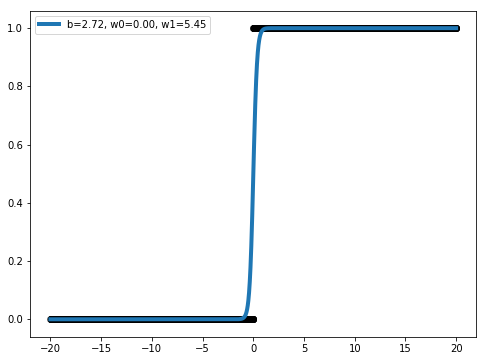

In [143]:
plt.figure(figsize=(8,6))
plt.scatter(X.tolist(), Y.tolist(), color='k',alpha=0.5)
plot_logistic(math.exp(1), 0, clf.coef_[0][0])
plt.legend(loc=2)

In [150]:
def generate_random_bin(p):
    if p >= random():
        return 1
    else:
        return 0

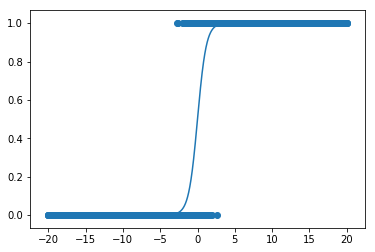

In [163]:
plt.plot(x, [logit(i, math.exp(1), 0, 1.7) for i in x])
y = [generate_random_bin(logit(i, math.exp(1), 0, 1.7)) for i in x]
plt.scatter(x, y)

In [164]:
X = np.matrix(x).reshape(4000,1)
Y = np.matrix(y).reshape((4000,1))

In [165]:
clf.fit(X,Y)

/Users/eguseva/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

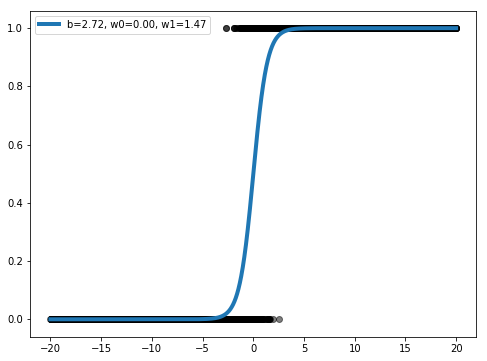

In [166]:
plt.figure(figsize=(8,6))
plt.scatter(X.tolist(), Y.tolist(), color='k',alpha=0.5)
plot_logistic(math.exp(1), 0, clf.coef_[0][0])
plt.legend(loc=2)

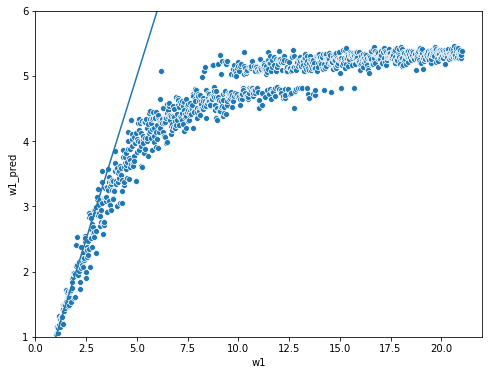

In [227]:
clf = LogisticRegression(fit_intercept=True, tol=0.0001)
predictions = []
for w in range(1,1001):
    predictions.append(predict_w1(clf, 1+w/50))
    pred_df = pd.DataFrame(predictions, columns=['w1', 'w1_pred'])
plt.figure(figsize=(8,6))
sns.scatterplot(pred_df.w1, pred_df.w1_pred)
plt.plot([1, 10], [1,10])
plt.ylim((1,6));

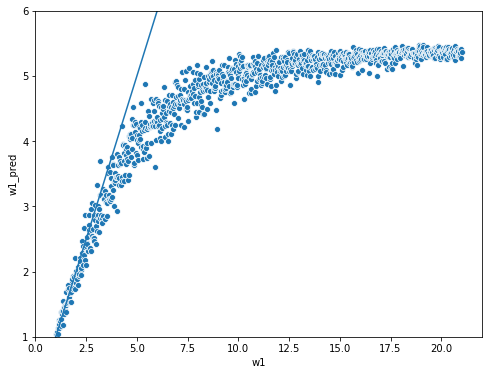

In [228]:
clf = LogisticRegression(fit_intercept=True, tol=0.000001)
predictions = []
for w in range(1,1001):
    predictions.append()
    pred_df = pd.DataFrame(predictions, columns=['w1', 'w1_pred'])
plt.figure(figsize=(8,6))
sns.scatterplot(pred_df.w1, pred_df.w1_pred)
plt.plot([1, 10], [1,10])
plt.ylim((1,6));

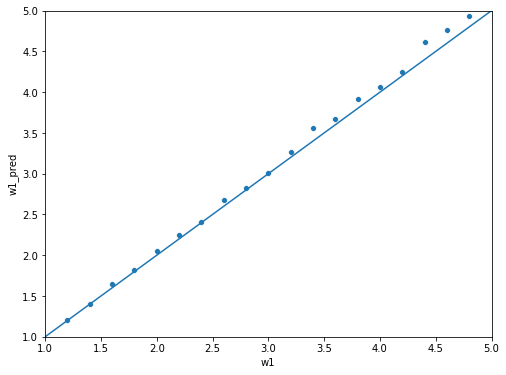

In [262]:
clf = LogisticRegression(fit_intercept=True, tol=0.0000001, C=100000)
predictions = []
for k in range(1,101):
    w = 1 + k/5
    pred = np.mean([predict_w1(clf, w)[1] for i in range(50)])
    predictions.append((w, pred))
    pred_df = pd.DataFrame(predictions, columns=['w1', 'w1_pred'])
plt.figure(figsize=(8,6))
sns.scatterplot(pred_df.w1, pred_df.w1_pred)
plt.plot([1, 20], [1,20])
plt.ylim((1,5));
plt.xlim((1,5));